In [187]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.image_utils import load_img, array_to_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,Convolution2D
from keras.applications.vgg16 import VGG16
from keras.utils import np_utils

In [225]:
data_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,  # 左右旋转
    width_shift_range=0.2,  # 左右偏移
    height_shift_range=0.2,  # 上下偏移
    shear_range=0.2,  # 随机裁剪
    zoom_range=0.2,  # 随机放大
    horizontal_flip=True,  # 水平翻转
)
data_gen_2 = ImageDataGenerator(
    rescale=1/255,
)

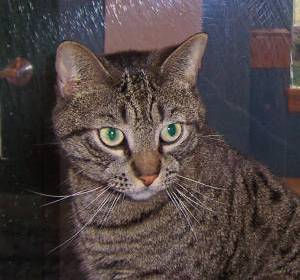

In [226]:
f = load_img('dataset/train/cat/cat.1.jpg')
f

In [227]:
vgg_model = VGG16(weights='imagenet',include_top=False)

In [228]:
train_flow = data_gen.flow_from_directory(directory='dataset/train',target_size=(150,150), shuffle=False)
test_flow = data_gen_2.flow_from_directory(directory='dataset/test',target_size=(150,150), shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [229]:
bottle_neck = vgg_model.predict(train_flow)
bottle_neck.shape

63/63 [==============================] - 56s 888ms/step


(2000, 4, 4, 512)

In [231]:
bottle_neck_test = vgg_model.predict(test_flow)
bottle_neck_test.shape

100/100 [==============================] - 28s 272ms/step


(1000, 4, 4, 512)

In [170]:
label_train = [0]*1000+[1]*1000
label_test = [0]*500+[1]*500
label_train = np_utils.to_categorical(label_train)
label_test = np_utils.to_categorical(label_test)

In [200]:
model = Sequential()
model.add(Flatten(input_shape = (4, 4, 512),))
model.add(Dense( activation='relu', units=128))
model.add(Dropout(0.4))
model.add(Dense(activation='softmax', units=2))

In [147]:
model = Sequential()
model.add(Convolution2D(input_shape=(150,150,3),filters=32,kernel_size=3,activation='relu',padding='same',))
model.add(MaxPooling2D(strides=1,pool_size=2,padding='valid'))
model.add(Convolution2D(filters=64, kernel_size=3, activation='relu',padding='same',))
model.add(MaxPooling2D(strides=1,pool_size=2,padding='valid'))
model.add(Flatten())
model.add(Dense(activation='relu', units=128))
model.add(Dropout(0.4))
model.add(Dense(activation='softmax', units=2))

In [201]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [202]:
model.fit(bottle_neck, label_train,
    epochs=3,
    validation_data=(bottle_neck_test,label_test)
)

Epoch 1/3
63/63 [==============================] - 1s 12ms/step - loss: 0.6655 - accuracy: 0.7045 - val_loss: 0.3421 - val_accuracy: 0.8400
Epoch 2/3
63/63 [==============================] - 1s 11ms/step - loss: 0.3865 - accuracy: 0.8250 - val_loss: 0.2927 - val_accuracy: 0.8820
Epoch 3/3
63/63 [==============================] - 1s 11ms/step - loss: 0.3289 - accuracy: 0.8525 - val_loss: 0.2869 - val_accuracy: 0.8730


In [223]:
f = load_img('dataset/train/cat/cat.2.jpg')
f = f.resize((150,150))
farray = img_to_array(f)
farray = farray.reshape((1,)+farray.shape)
vgg_predict = vgg_model.predict(farray)
print(vgg_predict.shape)
pre = model.predict(vgg_predict)
print('是猫' if pre[0][0] >=1 else '是狗')

1/1 [==============================] - 0s 52ms/step
(1, 4, 4, 512)
1/1 [==============================] - 0s 16ms/step
是猫
